# Homework4: Clustering
Use clustering algorithms to predict wine data.

Group menbers: 陈绮琳(2210515021), 贺祥瑞(2210515004).

### Procedure
* [Data Analysis](#predata)
* [Data Preprocessing](#b1)
* [K-means](#aa)
* [DBSCAN](#d1)
* [Hierarchical Clustering](#e1)
* [Comparison of Three Clustering Algorithms](#f1)

<a id='predata'></a>
## Data Analysis

### Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# data preprocessing
# read wine data
data = pd.read_table('data/wine.data', sep=',', header=None)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Data Description**

The data set contains 178 rows. From the `data.describe()` result, we can see that the mean values in column 5 & 13 are larger than other columns. So we need to do the feature normalization.

In [4]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [5]:
Y.unique()

array([1, 2, 3], dtype=int64)

The original labels of wine data is three. So the appropriate number of clustering might be three.

<a id='b1'></a>
## Data Preprocessing

In this section, we will do the feature normalization and visualize the original data.

In [6]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [7]:
X_scaled = pd.DataFrame(X)

In [8]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [9]:
X_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


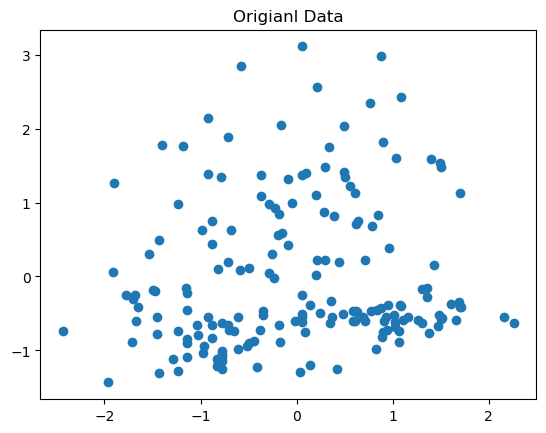

In [10]:
# original data
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1])
ax.set_title("Origianl Data")
plt.show()

<a id='aa'></a>
## K-means
K-means tries to minimize the sum of squared distances between each data point and its assigned centroid.

### Classification

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

pre_kmeans = kmeans.labels_
centroids_kmeans = kmeans.cluster_centers_

### Visualization

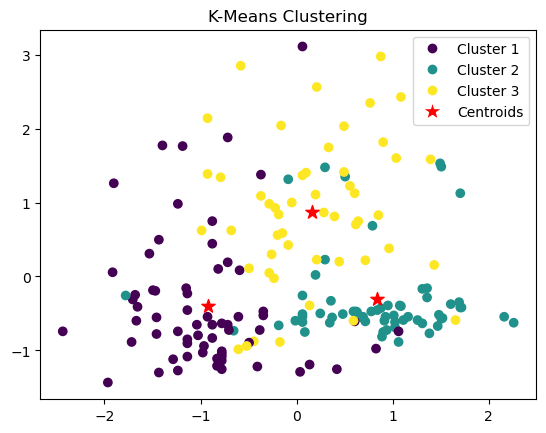

In [12]:
# predict clasification
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=pre_kmeans)
ax.scatter(centroids_kmeans[:,0], centroids_kmeans[:,1], marker='*', s=100, c='red')
handles, labels = scatter.legend_elements()
ax.legend(handles + [plt.Line2D([0], [0], marker='*', color='w', label='Centroids', markerfacecolor='red', markersize=15)], 
          ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroids'])
ax.set_title("K-Means Clustering")
plt.show()

### Silhouette Coefficient
The Silhouette Coefficient is a metric that measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a value of 1 indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters. A value of -1 indicates the opposite, and a value of 0 indicates that the object is equally matched to its own and neighboring clusters.

In [13]:
# Silhouette Coefficient
from sklearn import metrics

silhouette_score_kmeans = metrics.silhouette_score(X, pre_kmeans)

In [14]:
# score of the n_clusters=3
silhouette_score_kmeans

0.2848589191898987

### Different Number of Cluster

In [15]:
# different number of cluster
n_clusters = []
score_values = []
for i in range(2, 10):
    model = KMeans(n_clusters=i)
    model.fit(X)
    predict = model.labels_
    score = metrics.silhouette_score(X, predict)
    n_clusters.append(i)
    score_values.append(score)

In [16]:
max_index = np.argmax(score_values)
n_clusters[max_index]

3

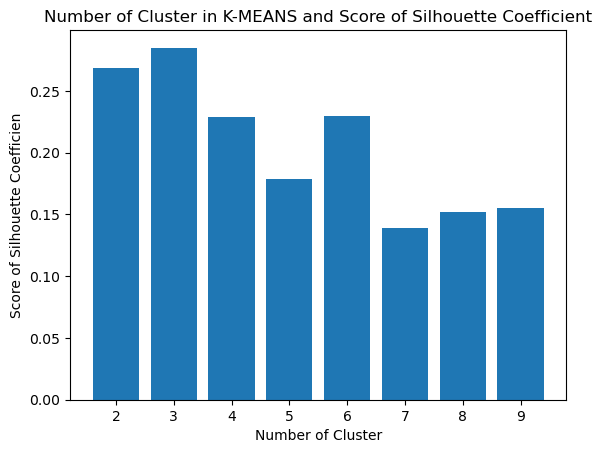

In [17]:
plt.bar(n_clusters, score_values)

plt.title("Number of Cluster in K-MEANS and Score of Silhouette Coefficient")
plt.xlabel("Number of Cluster")
plt.ylabel("Score of Silhouette Coefficien")
plt.show()

We can see that when the number of cluster is 3, its score of Silhouette Coefficient is largest.

**Conclusion:** The best number of cluster in wine data is 3.

<a id='d1'></a>
## DBSCAN

DBSCAN is a density-based clustering algorithm. It groups together points that are close to each other in a high-density region and separates points that are in low-density region.

### Choose the Range of `eps`
DBSCAN contains a parameter called `eps`, which controls the maximum distance between two points for them to be considered part of the same cluster. First, we need to determine the default value of it.

We use Kth-NearestNeighbors to show the distances. The knee in the curve is the reasonable eps value.

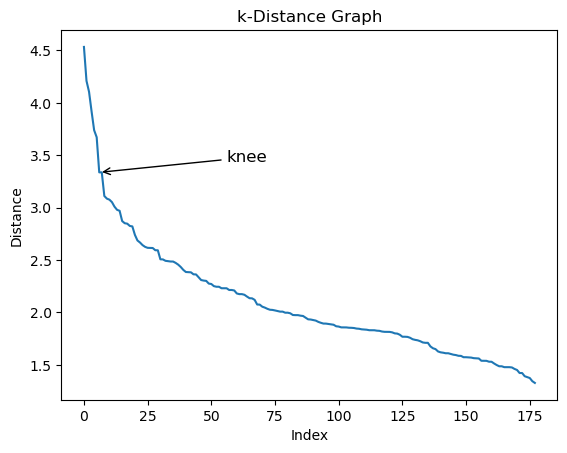

In [18]:
from sklearn.neighbors import NearestNeighbors

# Compute the distance matrix
distances = NearestNeighbors(n_neighbors=2).fit(X).kneighbors()[0][:,1]

# Sort the distances and plot them against the index of each point
distances_sorted = sorted(distances, reverse=True)
plt.plot(range(len(X)), distances_sorted)

# Identify the knee point
knee = np.argmax(np.diff(distances_sorted))
epsilon = distances_sorted[knee]

plt.title('k-Distance Graph')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.annotate('knee', xy=(knee, distances_sorted[knee]), xytext=(knee+50, distances_sorted[knee]+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.show()

In [19]:
distances_sorted[6]

3.3369180303365575

We choose the default value of eps is 3.3.

### Classification

In [20]:
from sklearn.cluster import DBSCAN

# use ramdon eps
# dbscan = DBSCAN(eps=2.3, min_samples=10)
dbscan = DBSCAN(eps=3.3, min_samples=10)
dbscan.fit(X)

pre_dbscan = dbscan.labels_

# number of clusters
n_clusters = len(set(pre_dbscan)) - (1 if -1 in pre_dbscan else 0)

# classify points into three type
core_samples_mask = np.zeros_like(pre_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
core_points = np.where(core_samples_mask)[0]
boundary_points = np.where(~core_samples_mask & (pre_dbscan != -1))[0]
noise_points = np.where(labels == -1)[0]

In [21]:
n_clusters

1

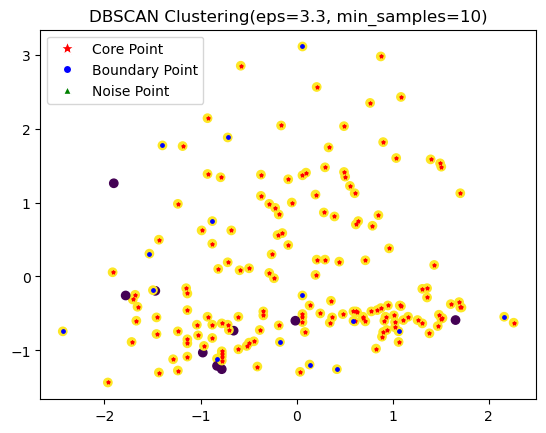

In [22]:
# plt.scatter(X[:, 0], X[:, 1], c=pre_dbscan)
# plt.show()

# predict clasification
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=pre_dbscan)

ax.scatter(X[core_points, 0], X[core_points, 1], marker='*', s=6, c='red')
ax.scatter(X[boundary_points, 0], X[boundary_points, 1], marker='o', s=6, c='blue')
ax.scatter(X[noise_points, 0], X[noise_points, 1], marker='^', s=6, c='green')
handles, labels = scatter.legend_elements()
legend_elements = [plt.Line2D([0], [0], marker='*', color='w', label='Core Point', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Boundary Point', markerfacecolor='blue', markersize=6),
                   plt.Line2D([0], [0], marker='^', color='w', label='Noise Point', markerfacecolor='green', markersize=6)]
plt.legend(handles=legend_elements, loc='best')
ax.set_title("DBSCAN Clustering(eps=3.3, min_samples=10)")
plt.show()

The `calinski_harabasz_score` is a ratio between the sum of the distances between the cluster centers and the variance within each cluster. It measures the degree of separation between different clusters and higher values indicate better defined clusters. Therefore, a higher calinski_harabasz_score indicates a better clustering result.

The `davies_bouldin_score` measures the similarity between clusters. It is defined as the average similarity between each cluster and its most similar cluster, normalized by the distance between the cluster centers. The lower the davies_bouldin_score, the better the clustering result, as it indicates that the clusters are well separated and distinct from each other.

In [23]:
tightness_score = metrics.calinski_harabasz_score(X, pre_dbscan)
resolution_score = metrics.davies_bouldin_score(X, pre_dbscan)

In [24]:
tightness_score

4.853613175811189

In [25]:
resolution_score

2.9367179228022864

### Different eps and min_samples

In [26]:
# different eps and min_samples
eps_init = 2
eps_values = []
tightness_score_values = []
resolution_score_values = []
for i in range(1, 20):
    eps = eps_init + 0.1 * i
    dbscan_model = DBSCAN(eps=eps, min_samples=10)
    dbscan_model.fit(X)
    predict = dbscan_model.labels_
    tightness_score = metrics.calinski_harabasz_score(X, predict)
    resolution_score = metrics.davies_bouldin_score(X, predict)
    eps_values.append(eps)
    tightness_score_values.append(tightness_score)
    resolution_score_values.append(resolution_score)       

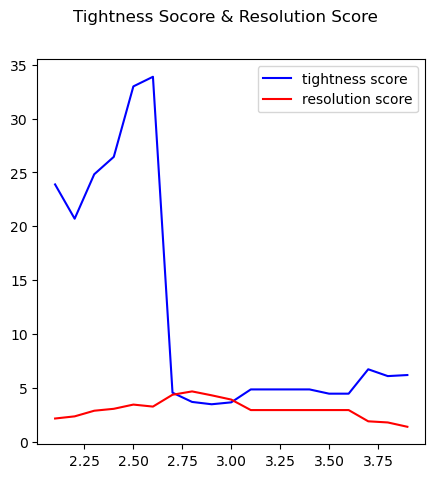

In [27]:
fig = plt.figure(figsize=(5, 5))
fig.suptitle('Tightness Socore & Resolution Score')
plt.plot(eps_values, tightness_score_values, 'b', label='tightness score')
plt.plot(eps_values, resolution_score_values, 'r', label='resolution score')
plt.legend()
plt.show()

We should maximum `abs(tightness score - resolution score)`.

In [28]:
abs_diff = np.abs(np.array(tightness_score_values) - np.array(resolution_score_values))
max_abs_index = np.argmax(abs_diff)
eps_values[max_abs_index]

2.6

**Conclusion:** The best eps is 2.6.

Use the same way to find the best min_samples.

In [29]:
# different eps and min_samples
min_samples = 1
min_samples_values = []
tightness_score_values = []
resolution_score_values = []
for i in range(1, 20):
    dbscan_model = DBSCAN(eps=2.6, min_samples=i)
    dbscan_model.fit(X)
    predict = dbscan_model.labels_
    tightness_score = metrics.calinski_harabasz_score(X, predict)
    resolution_score = metrics.davies_bouldin_score(X, predict)
    min_samples_values.append(i)
    tightness_score_values.append(tightness_score)
    resolution_score_values.append(resolution_score)

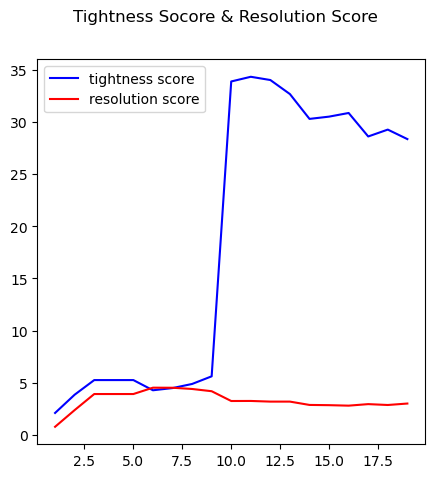

In [30]:
fig = plt.figure(figsize=(5, 5))
fig.suptitle('Tightness Socore & Resolution Score')
plt.plot(min_samples_values, tightness_score_values, 'b', label='tightness score')
plt.plot(min_samples_values, resolution_score_values, 'r', label='resolution score')
plt.legend()
plt.show()

In [31]:
abs_diff = np.abs(np.array(tightness_score_values) - np.array(resolution_score_values))
max_abs_index = np.argmax(abs_diff)
min_samples_values[max_abs_index]

11

**Conclusion:** The best min_samples is 11. So far, we get the best eps=2.6, best min_samples=11.

We use these parameters to classify wine data again.

In [32]:

dbscan = DBSCAN(eps=2.6, min_samples=11)
dbscan.fit(X)

pre_dbscan = dbscan.labels_

# number of clusters
n_clusters = len(set(pre_dbscan)) - (1 if -1 in pre_dbscan else 0)

# classify points into three type
core_samples_mask = np.zeros_like(pre_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
core_points = np.where(core_samples_mask)[0]
boundary_points = np.where(~core_samples_mask & (pre_dbscan != -1))[0]
noise_points = np.where(labels == -1)[0]

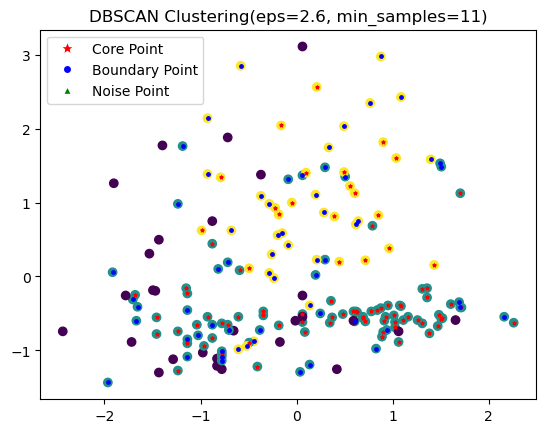

In [33]:
# predict clasification
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=pre_dbscan)

ax.scatter(X[core_points, 0], X[core_points, 1], marker='*', s=6, c='red')
ax.scatter(X[boundary_points, 0], X[boundary_points, 1], marker='o', s=6, c='blue')
ax.scatter(X[noise_points, 0], X[noise_points, 1], marker='^', s=6, c='green')
handles, labels = scatter.legend_elements()
legend_elements = [plt.Line2D([0], [0], marker='*', color='w', label='Core Point', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Boundary Point', markerfacecolor='blue', markersize=6),
                   plt.Line2D([0], [0], marker='^', color='w', label='Noise Point', markerfacecolor='green', markersize=6)]
plt.legend(handles=legend_elements, loc='best')
ax.set_title("DBSCAN Clustering(eps=2.6, min_samples=11)")
plt.show()

In [34]:
silhouette_score_dbscan = metrics.silhouette_score(X, pre_dbscan)
tightness_score_dbscan = metrics.calinski_harabasz_score(X, pre_dbscan)
resolution_score_dbscan = metrics.davies_bouldin_score(X, pre_dbscan)

silhouette_score_dbscan, tightness_score_dbscan, resolution_score_dbscan

(0.21199057733148635, 34.32396365317588, 3.2658288104425828)

**Conclusion**: With the eps=2.6, min_samples=11, the DBSCAN classified wine data into 2 cluster.

<a id='e1'></a>
## Hierarchical Clustering

Agglomerative Clustering is a hierarchical clustering algorithm that starts with each data point as a separate cluster and then recursively merges the closest pairs of clusters until a stopping criterion is met. The algorithm constructs a dendrogram (a tree-like diagram) to represent the hierarchy of clusters.

In [35]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(X)
pre_agglomerative = agglomerative.labels_

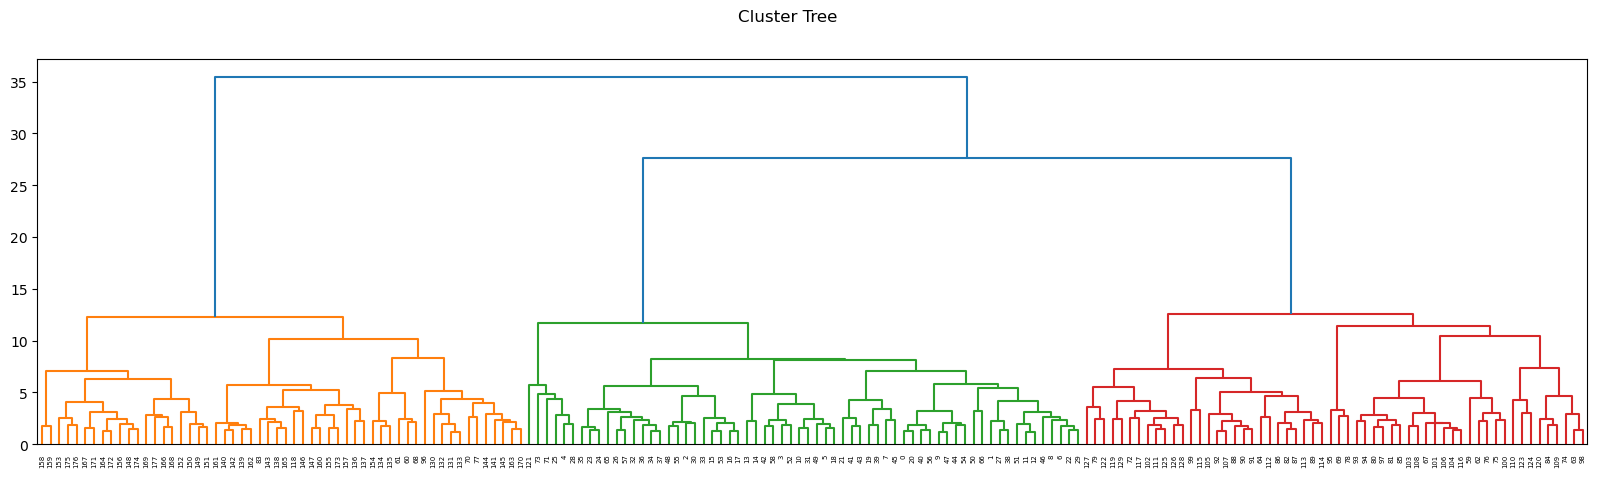

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Cluster Tree')
dendrogram(Z)
plt.show()

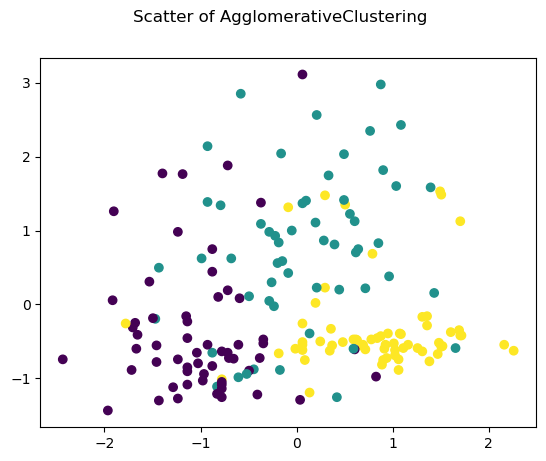

In [37]:
fig = plt.figure()
fig.suptitle('Scatter of AgglomerativeClustering')
plt.scatter(X[:, 0], X[:, 1], c=pre_agglomerative)
plt.show()

In [38]:
silhouette_score_agglomerativeClustering = metrics.silhouette_score(X, pre_agglomerative)
tightness_score_agglomerativeClustering = metrics.calinski_harabasz_score(X, pre_agglomerative)
resolution_score_agglomerativeClustering = metrics.davies_bouldin_score(X, pre_agglomerative)

silhouette_score_agglomerativeClustering, tightness_score_agglomerativeClustering, resolution_score_agglomerativeClustering

(0.2774439826952266, 67.6474675044098, 1.4185919431857321)

**Conclusion:** We use `AgglomerativeClustering(n_clusters=3)` to classify wine data.

<a id='f1'></a>
## Comparison of Three Clustering Algorithms
### Scatter

#### 1. K-means

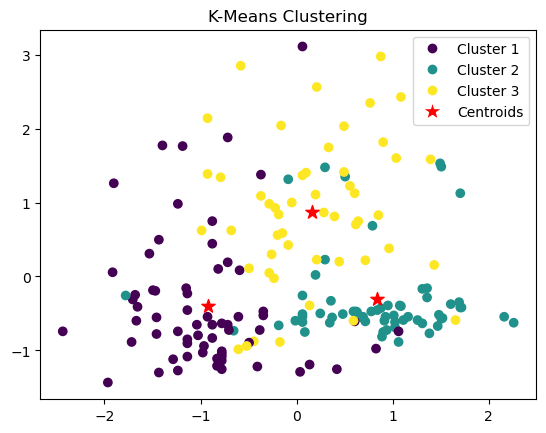

In [39]:
import matplotlib.pyplot as plt

# predict clasification
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=pre_kmeans)
ax.scatter(centroids_kmeans[:,0], centroids_kmeans[:,1], marker='*', s=100, c='red')
handles, labels = scatter.legend_elements()
ax.legend(handles + [plt.Line2D([0], [0], marker='*', color='w', label='Centroids', markerfacecolor='red', markersize=15)], 
          ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroids'])
ax.set_title("K-Means Clustering")
plt.show()

#### 2. DBSCAN

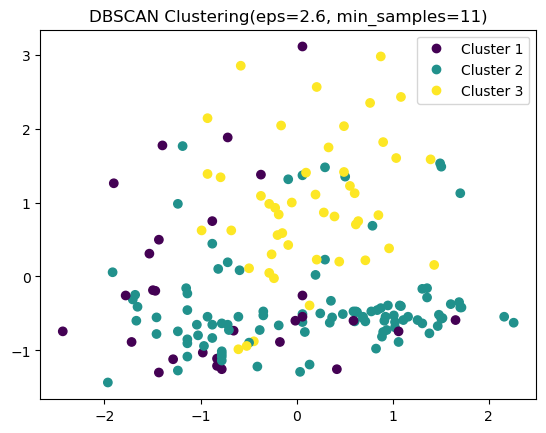

In [40]:
# predict clasification
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=pre_dbscan)
handles, labels = scatter.legend_elements()
ax.legend(handles, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_title("DBSCAN Clustering(eps=2.6, min_samples=11)")
plt.show()

#### 3. AgglomerativeClustering

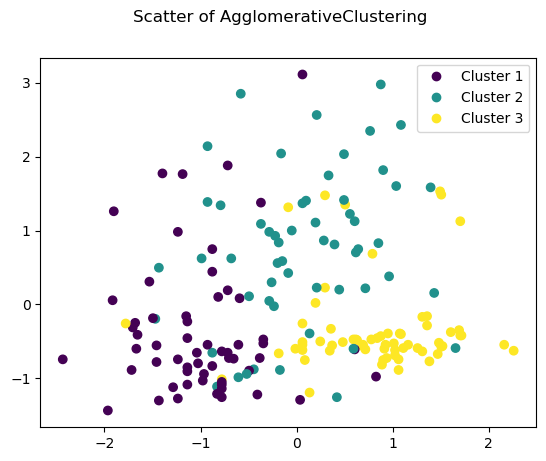

In [41]:
fig, ax = plt.subplots()
fig.suptitle('Scatter of AgglomerativeClustering')
plt.scatter(X[:, 0], X[:, 1], c=pre_agglomerative)
handles, labels = scatter.legend_elements()
ax.legend(handles, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

**Conclusion:** The scatters of `K-means` and `AgglomerativeClustering` are likely, but the scatter of `DBSCAN` is different from the other.

### Performance

In [42]:
silhouette_score_kmeans = metrics.silhouette_score(X, pre_kmeans)
tightness_score_kmeans = metrics.calinski_harabasz_score(X, pre_kmeans)
resolution_score_kmeans = metrics.davies_bouldin_score(X, pre_kmeans)

silhouette_score_dbscan = metrics.silhouette_score(X, pre_dbscan)
tightness_score_dbscan = metrics.calinski_harabasz_score(X, pre_dbscan)
resolution_score_dbscan = metrics.davies_bouldin_score(X, pre_dbscan)

silhouette_score_agglomerativeClustering = metrics.silhouette_score(X, pre_agglomerative)
tightness_score_agglomerativeClustering = metrics.calinski_harabasz_score(X, pre_agglomerative)
resolution_score_agglomerativeClustering = metrics.davies_bouldin_score(X, pre_agglomerative)

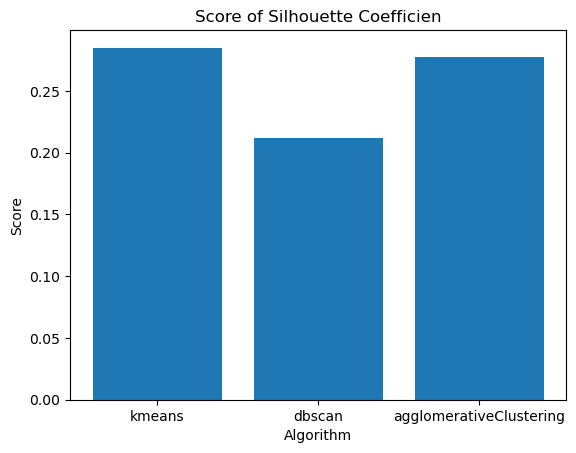

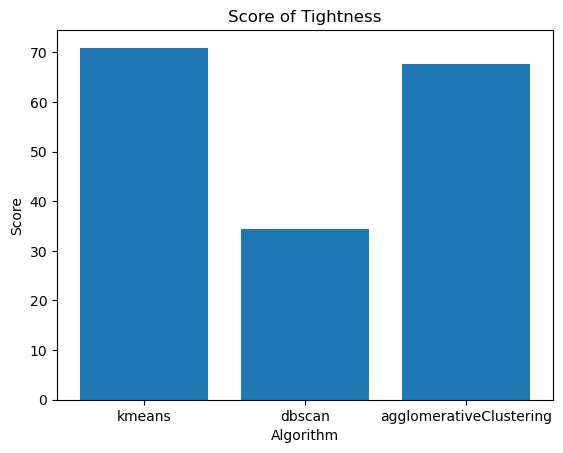

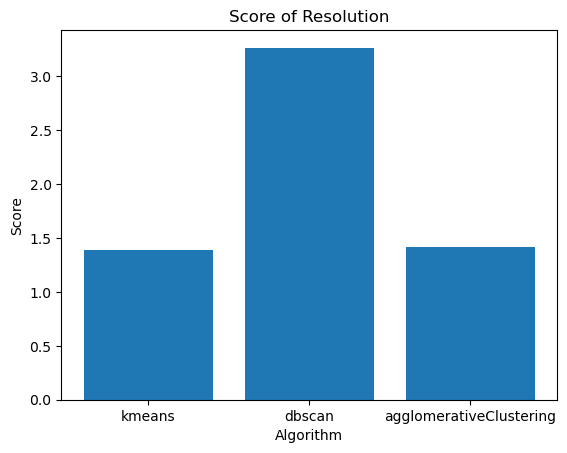

In [43]:
names = ['kmeans', 'dbscan', 'agglomerativeClustering']

plt.bar(names, [silhouette_score_kmeans, silhouette_score_dbscan, silhouette_score_agglomerativeClustering])
plt.title("Score of Silhouette Coefficien")
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.show()


plt.bar(names, [tightness_score_kmeans, tightness_score_dbscan, tightness_score_agglomerativeClustering])
plt.title("Score of Tightness")
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.show()


plt.bar(names, [resolution_score_kmeans, resolution_score_dbscan, resolution_score_agglomerativeClustering])
plt.title("Score of Resolution")
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.show()


**Conclusion:** `K-means` has the highest score of silhouette coefficien and tightness, and lowest score of resolution. 
This imply that the outcome of clustering is best.

### Advantages and Disadvantages, Applicable Scenarios and Improvement Methods

**K-means:**

* Advantages:
    * Simple and easy to implement
    * Fast and efficient for large datasets
    * Good for high-dimensional data
* Disadvantages:
    * Sensitive to initial conditions and outliers
    * Can converge to local optima
    * Number of clusters needs to be specified
* Applicable Scenarios:
    * Data with well-separated clusters
    * Large datasets
    * High-dimensional data
* Improvement methods:
    * Using multiple random initializations and taking the best result
    * Using k-means++ initialization to choose initial cluster centers

**DBSCAN:**

* Advantages
    * Does not require the number of clusters to be specified beforehand
    * Can find clusters of arbitrary shapes and sizes
    * Robust to noise and outliers
* Disadvantages
    * Sensitive to the choice of hyperparameters, particularly the distance metric and epsilon value
    * Can be computationally expensive for large datasets
    * Struggles to separate clusters that are close together
* Applicable Scenarios
    * When the number of clusters is unknown
    * When the clusters have arbitrary shapes and sizes
    * When the data has noise and outliers
* Improvement Methods
    * Tuning the hyperparameters, such as the distance metric and epsilon value
    * Using a hierarchical clustering method to help select the appropriate hyperparameters
    * Using a different clustering algorithm for datasets where DBSCAN struggles

**Agglomerative Clustering:**
* Advantages
    * Can find clusters of arbitrary shapes and sizes
    * Can be used with different distance metrics
    * Can produce a hierarchy of clusters
* Disadvantages
    * Can be computationally expensive for large datasets
    * May not work well for clusters with different sizes or densities
    * Can produce imbalanced or skewed trees
* Applicable Scenarios
    * When the number of clusters is unknown
    * When the clusters have arbitrary shapes and sizes
    * When a hierarchy of clusters is desired
* Improvement Methods
    * Using a different linkage criterion to improve clustering results
    * Using a variant of Agglomerative Clustering, such as Divisive Clustering
    * Using a different clustering algorithm for datasets where Agglomerative Clustering struggles